# Clustering Drugs and Classes

Here we are clustring classes based on two factors
- Volume sold per month
- Price change per month

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

## Based on Volume

In [8]:
# Loading the dataset
trx = pd.read_csv('../Processed_Data/Class aggregated/aggregated_trx_class.csv', index_col='Date')
trx.head(10)

,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,2590.0,NaN,1419308.0,559.0,77731.0,34008.0,80851.0,927023.0,4740.0,78288.0,...,5803135.0,705004.0,NaN,5788.0,155.0,1871470.0,543747.0,273977.0,61659.0,1052.0
2014_09,2865.0,NaN,1479415.0,617.0,75847.0,34105.0,84698.0,947541.0,4665.0,80983.0,...,6194971.0,706012.0,NaN,6000.0,124.0,1889276.0,545202.0,437213.0,48981.0,1158.0
2014_10,2656.0,NaN,1569909.0,594.0,84794.0,35069.0,82018.0,948974.0,4580.0,84325.0,...,6426457.0,726187.0,NaN,6244.0,131.0,1938759.0,564256.0,776294.0,43253.0,1160.0
2014_11,2503.0,NaN,1411803.0,619.0,87516.0,32128.0,44888.0,858943.0,4170.0,76945.0,...,5941924.0,657099.0,NaN,5404.0,137.0,1788978.0,516835.0,515860.0,41046.0,1004.0
2014_12,3078.0,NaN,1508548.0,1389.0,101306.0,35810.0,47736.0,921016.0,4430.0,175874.0,...,6810177.0,744866.0,NaN,6498.0,175.0,3898129.0,570719.0,431897.0,53042.0,1221.0
2015_01,2031.0,NaN,1488026.0,2635.0,98760.0,31976.0,38322.0,888625.0,4061.0,80759.0,...,6381773.0,678881.0,NaN,5803.0,147.0,1849834.0,529441.0,355150.0,51259.0,1100.0
2015_02,2135.0,NaN,1362150.0,4013.0,94143.0,29182.0,34173.0,798203.0,3773.0,74023.0,...,5737766.0,613565.0,NaN,5280.0,154.0,1673233.0,474143.0,311196.0,52909.0,1046.0
2015_03,2693.0,NaN,1537702.0,6643.0,105803.0,32725.0,39540.0,887316.0,4005.0,85106.0,...,6450702.0,683083.0,NaN,5915.0,189.0,1861018.0,527401.0,324349.0,62515.0,1055.0
2015_04,2550.0,1.0,1507488.0,7901.0,102580.0,31895.0,37053.0,845494.0,4133.0,83072.0,...,6287345.0,658611.0,NaN,5573.0,172.0,1802222.0,510755.0,301809.0,60570.0,1019.0


In [9]:
# Computing percent change in volume from month to month for each class
trx_change = trx.pct_change().iloc[1:, :]
trx_change.head()

,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_09,0.106178,NaN,0.042350,0.103757,-0.024237,0.002852,0.047581,0.022133,-0.015823,0.034424,...,0.067521,0.001430,NaN,0.036628,-0.200000,0.009514,0.002676,0.595802,-0.205615,0.100760
2014_10,-0.072949,NaN,0.061169,-0.037277,0.117961,0.028266,-0.031642,0.001512,-0.018221,0.041268,...,0.037367,0.028576,NaN,0.040667,0.056452,0.026192,0.034949,0.775551,-0.116943,0.001727
2014_11,-0.057605,NaN,-0.100710,0.042088,0.032101,-0.083863,-0.452706,-0.094872,-0.089520,-0.087519,...,-0.075397,-0.095138,NaN,-0.134529,0.045802,-0.077256,-0.084042,-0.335484,-0.051025,-0.134483
2014_12,0.229724,NaN,0.068526,1.243942,0.157571,0.114604,0.063447,0.072267,0.062350,1.285711,...,0.146123,0.133567,NaN,0.202443,0.277372,1.178970,0.104258,-0.162763,0.292257,0.216135
2015_01,-0.340156,NaN,-0.013604,0.897048,-0.025132,-0.107065,-0.197210,-0.035169,-0.083296,-0.540813,...,-0.062906,-0.088586,NaN,-0.106956,-0.160000,-0.525456,-0.072326,-0.177697,-0.033615,-0.099099


In [10]:
# Transposing and cleaning each record
cluster_df = trx_change.transpose().fillna(0)
cluster_df = cluster_df.replace(np.inf, 0)
cluster_df

Date,2014_09,2014_10,2014_11,2014_12,2015_01,2015_02,2015_03,2015_04,2015_05,2015_06,...,2019_03,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12
A.C.T.H.,0.106178,-0.072949,-0.057605,0.229724,-0.340156,0.051206,0.261358,-0.053101,-0.135294,0.201814,...,0.063596,0.087113,0.006638,-0.157325,0.083287,-0.023736,-0.072939,0.064424,-0.152651,0.111252
A05A1 CHOLERETICS+CHOLEKINETIC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-0.500000,0.000000,0.000000,1.000000,-0.500000,-1.000000,0.000000
ADHD,0.042350,0.061169,-0.100710,0.068526,-0.013604,-0.084593,0.128879,-0.019649,-0.045605,-0.068187,...,0.093519,0.008735,-0.010481,-0.147966,0.050917,0.088965,-0.030492,0.091699,-0.077547,0.028879
ALL OTHER RESPIRATORY,0.103757,-0.037277,0.042088,1.243942,0.897048,0.522960,0.655370,0.189372,-0.026579,0.182031,...,0.034045,0.031808,0.041374,-0.050740,0.087482,-0.034713,-0.059519,0.127847,-0.181211,0.156205
ALL OTHER THERAPEUTICS,-0.024237,0.117961,0.032101,0.157571,-0.025132,-0.046750,0.123854,-0.030462,0.002817,0.042948,...,0.126891,-0.002110,-0.003300,-0.098446,0.089357,-0.012763,-0.062966,0.095375,-0.065626,0.130204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THYROID ANTI-THYROID AND IODINE PREPS,0.009514,0.026192,-0.077256,1.178970,-0.525456,-0.095469,0.112229,-0.031593,-0.008417,0.025208,...,0.078536,0.015598,0.001901,-0.073573,0.064319,-0.031995,-0.053614,0.064132,-0.088381,0.083238
URINARY INCONTINENCE,0.002676,0.034949,-0.084042,0.104258,-0.072326,-0.104446,0.112325,-0.031562,-0.007080,0.029069,...,0.099147,0.008890,-0.095390,-0.085341,0.041454,-0.025776,-0.048014,0.068900,-0.068325,0.069156
"VACCINES (PURE, COMB, OTHER)",0.595802,0.775551,-0.335484,-0.162763,-0.177697,-0.123762,0.042266,-0.069493,0.005646,0.114661,...,-0.016398,-0.051563,0.098242,-0.008926,0.087459,0.166190,0.254424,8.968630,-0.585210,-0.507438
VIRAL HEPATITIS,-0.205615,-0.116943,-0.051025,0.292257,-0.033615,0.032189,0.181557,-0.031113,-0.089351,0.009844,...,0.074231,0.051765,0.007022,-0.091217,0.035281,-0.056112,-0.034492,0.103142,-0.119468,0.097104


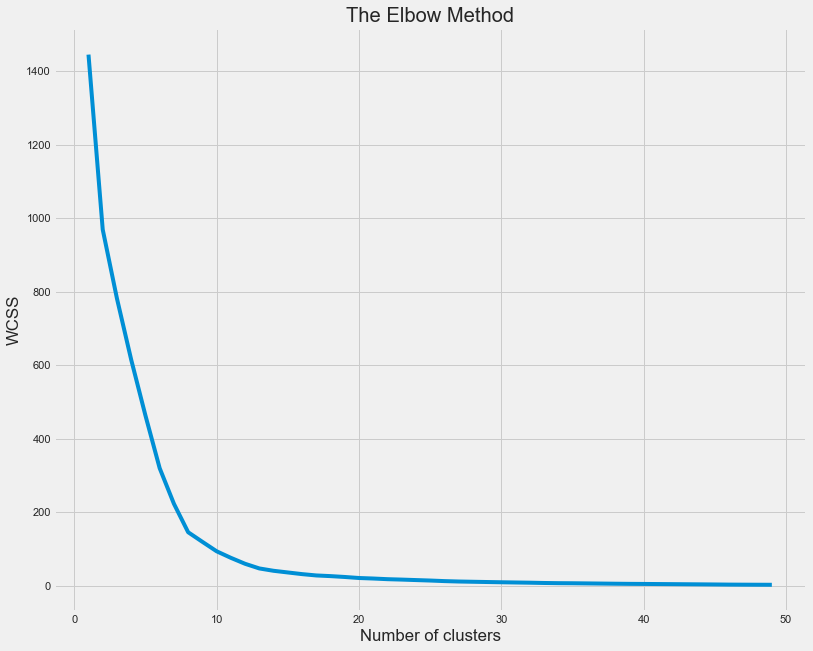

In [11]:
# Computing clusters and minimizing the WCSS
X = cluster_df.values

wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

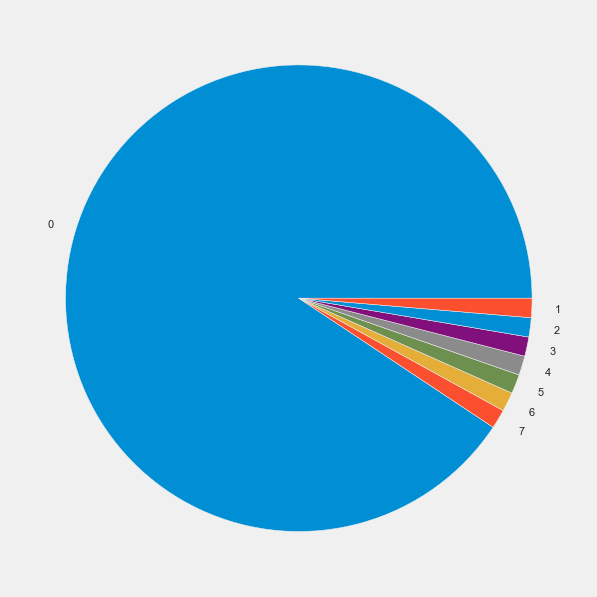

In [16]:
# Visualizing results for optimal number of clusters
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
cluster_df['cluster'] = y_kmeans
plt.pie(cluster_df.cluster.value_counts(), labels=cluster_df.cluster.value_counts().index)

plt.show()

In [17]:
# Visualizing the outliers
pd.set_option('display.max_rows', None)
cluster_df['cluster'].to_frame()[cluster_df['cluster'].to_frame().cluster != 0]

,cluster
"CANCER DETOX AG, ANTI-NAUSEANTS",6
"COUGH COLD, INCL FLU ANTIVIRALS",7
HOSPITAL SOLUTIONS,2
OTHER WOMEN'S HEALTH,5
RESP ANTIVIRALS EX FLU,3
SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,4
"VACCINES (PURE, COMB, OTHER)",1


## Based on price percent change

In [19]:
# Loading the dataset
price_pct_change = pd.read_csv('../Processed_Data/Class aggregated/aggregated_weighted_pct_change_class.csv', index_col='Date')
price_pct_change.head(10)

,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,0.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2014_09,0.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000361,0.000000,0.000000,...,0.007691,0.003176,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2014_10,0.000000,NaN,0.000000,0.0,0.000000,0.000000,0.055941,0.016685,0.000000,0.000000,...,0.000203,0.003132,NaN,0.000000,0.000000,0.000000,0.000000,0.013962,0.000000,0.0
2014_11,0.000000,NaN,0.000000,0.0,0.075888,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000969,NaN,0.000000,0.000000,0.002156,0.000000,0.016825,0.000000,0.0
2014_12,0.020047,NaN,0.021251,0.0,0.000000,0.000000,0.000000,0.000000,0.000271,0.034499,...,0.000175,0.000051,NaN,0.000000,0.000000,0.022750,0.000000,0.000000,0.001421,0.0
2015_01,0.000000,NaN,0.079012,0.0,0.008394,0.098977,0.043361,0.000343,0.000000,0.000000,...,0.053976,0.089067,NaN,0.074329,0.000000,0.000819,0.023685,0.000000,0.000740,0.0
2015_02,0.000000,NaN,0.000000,0.0,0.077914,0.000000,0.000000,0.000000,0.000000,0.000001,...,0.000000,0.001076,NaN,0.000000,0.039993,0.000000,0.077950,0.000000,0.000000,0.0
2015_03,0.000000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.032448,0.000000,0.0
2015_04,0.000000,0.0,0.001800,0.0,0.000000,0.000000,0.023474,0.102634,0.000000,0.000000,...,0.008300,0.000048,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [21]:
# Transposing and cleaning each record
cluster_df = price_pct_change.transpose().fillna(0)
cluster_df = cluster_df.replace(np.inf, 0)
cluster_df.head()

Date,2014_08,2014_09,2014_10,2014_11,2014_12,2015_01,2015_02,2015_03,2015_04,2015_05,...,2019_03,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12
A.C.T.H.,0.0,0.0,0.0,0.000000,0.020047,0.000000,0.000000,0.0,0.0000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0
A05A1 CHOLERETICS+CHOLEKINETIC,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0
ADHD,0.0,0.0,0.0,0.000000,0.021251,0.079012,0.000000,0.0,0.0018,0.013636,...,0.004820,0.0,0.02673,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000,0.0
ALL OTHER RESPIRATORY,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,...,0.000000,0.0,0.00000,0.0,0.0,0.010499,0.000000e+00,0.0,0.000000,0.0
ALL OTHER THERAPEUTICS,0.0,0.0,0.0,0.075888,0.000000,0.008394,0.077914,0.0,0.0000,0.000103,...,0.005026,0.0,0.00000,0.0,0.0,0.000000,1.878704e-09,0.0,0.004694,0.0


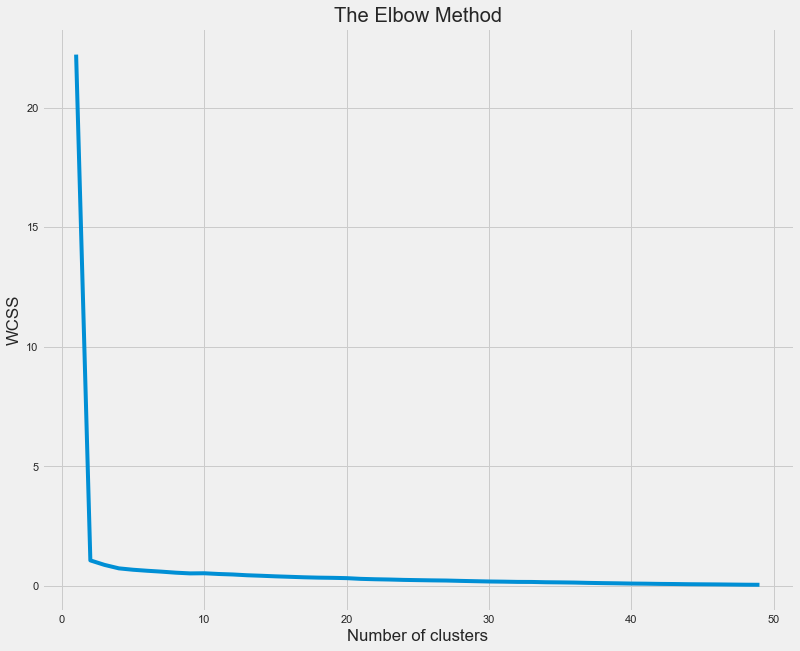

In [22]:
# Computing clusters and minimizing the WCSS
X = cluster_df.values

wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

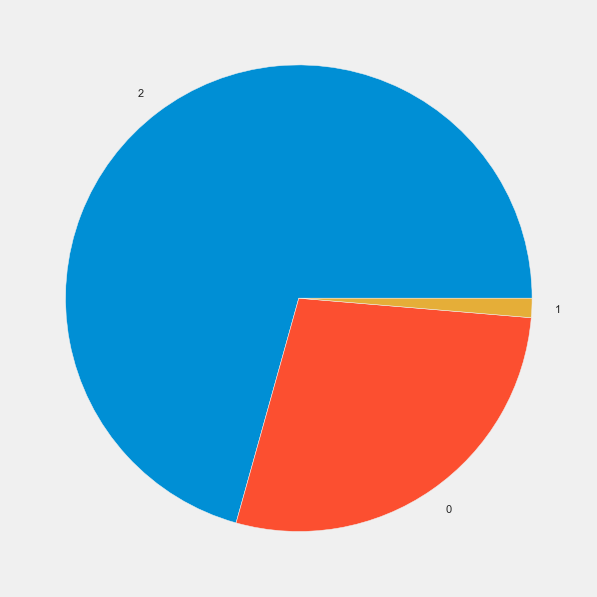

In [26]:
# Visualizing results for optimal number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
cluster_df['cluster'] = y_kmeans
plt.pie(cluster_df.cluster.value_counts(), labels=cluster_df.cluster.value_counts().index)

plt.show()